# Semiconductor dopant screening

## Application to titanium dioxide

In [2]:
from smact.dopant_prediction.doper import Doper

The Doper module includes the functions `get_dopants`. These require an input (tuple(str)), which is formed by the ionic species of the material.

By default, the top five p-type and n-type candidates are reported. 

In [4]:
material = Doper(("Ti4+", "O2-"))
material.get_dopants()

{'n-type cation substitutions': [('Ta5+', 8.790371775858281e-05),
  ('Nb5+', 7.830035204694342e-05),
  ('Sb5+', 6.259166355036722e-05),
  ('Ru5+', 4.904126561555437e-05),
  ('Re5+', 4.546178573532138e-05)],
 'p-type cation substitutions': [('Na1+', 0.00010060400812977031),
  ('Zn2+', 8.56373996146833e-05),
  ('Mn2+', 8.563568688381837e-05),
  ('Mg2+', 6.777016806765154e-05),
  ('Fe3+', 6.259479321178562e-05)],
 'n-type anion substitutions': [('F1-', 0.01508116810515677),
  ('Cl1-', 0.004737202729901607),
  ('H1-', 9.31310255126729e-08),
  ('C1-', 9.31310255126729e-08),
  ('N1-', 9.31310255126729e-08)],
 'p-type anion substitutions': [('N3-', 0.0014663800608945628),
  ('C4-', 9.31310255126729e-08),
  ('C3-', 9.31310255126729e-08),
  ('Si4-', 9.31310255126729e-08),
  ('Si3-', 9.31310255126729e-08)]}

Ternary and multicomponent systems can also be tested.

In [5]:
quaternary = Doper(("Cu1+", "Zn2+", "Ge4+", "S2-"))
quaternary.get_dopants()

{'n-type cation substitutions': [('Ge4+', 0.0015914201920862318),
  ('Ge4+', 0.0015914201920862318),
  ('Zn2+', 0.001162004835910505),
  ('Si4+', 0.0008777853600526021),
  ('Si4+', 0.0008777853600526021)],
 'p-type cation substitutions': [('Cu1+', 0.0036311406230084362),
  ('Cu1+', 0.0036311406230084362),
  ('Zn2+', 0.001162004835910505),
  ('Ag1+', 0.0004187742948950742),
  ('Ag1+', 0.0004187742948950742)],
 'n-type anion substitutions': [('Cl1-', 0.000708721114826238),
  ('F1-', 0.00021217514709258802),
  ('H1-', 9.31310255126729e-08),
  ('C1-', 9.31310255126729e-08),
  ('N1-', 9.31310255126729e-08)],
 'p-type anion substitutions': [('N3-', 0.0007862635952461277),
  ('C4-', 9.31310255126729e-08),
  ('C3-', 9.31310255126729e-08),
  ('Si4-', 9.31310255126729e-08),
  ('Si3-', 9.31310255126729e-08)]}

If you want to plot the results in the form of heatmap, set `plot_heatmap` True.

{'n-type cation substitutions': [('Ge4+', 0.0015914201920862318),
  ('Ge4+', 0.0015914201920862318),
  ('Zn2+', 0.001162004835910505),
  ('Si4+', 0.0008777853600526021),
  ('Si4+', 0.0008777853600526021),
  ('Co2+', 0.00038676299875561366),
  ('Cd2+', 0.00034479571082730946),
  ('Mg2+', 0.00034293540270251613),
  ('Mn2+', 0.00033249741948425897),
  ('Cu2+', 0.00025278822910808205)],
 'p-type cation substitutions': [('Cu1+', 0.0036311406230084362),
  ('Cu1+', 0.0036311406230084362),
  ('Zn2+', 0.001162004835910505),
  ('Ag1+', 0.0004187742948950742),
  ('Ag1+', 0.0004187742948950742),
  ('Co2+', 0.00038676299875561366),
  ('Cd2+', 0.00034479571082730946),
  ('Mg2+', 0.00034293540270251613),
  ('Mn2+', 0.00033249741948425897),
  ('Na1+', 0.00025743109681607455)],
 'n-type anion substitutions': [('Cl1-', 0.000708721114826238),
  ('F1-', 0.00021217514709258802),
  ('H1-', 9.31310255126729e-08),
  ('C1-', 9.31310255126729e-08),
  ('N1-', 9.31310255126729e-08),
  ('O1-', 9.31310255126729e-08

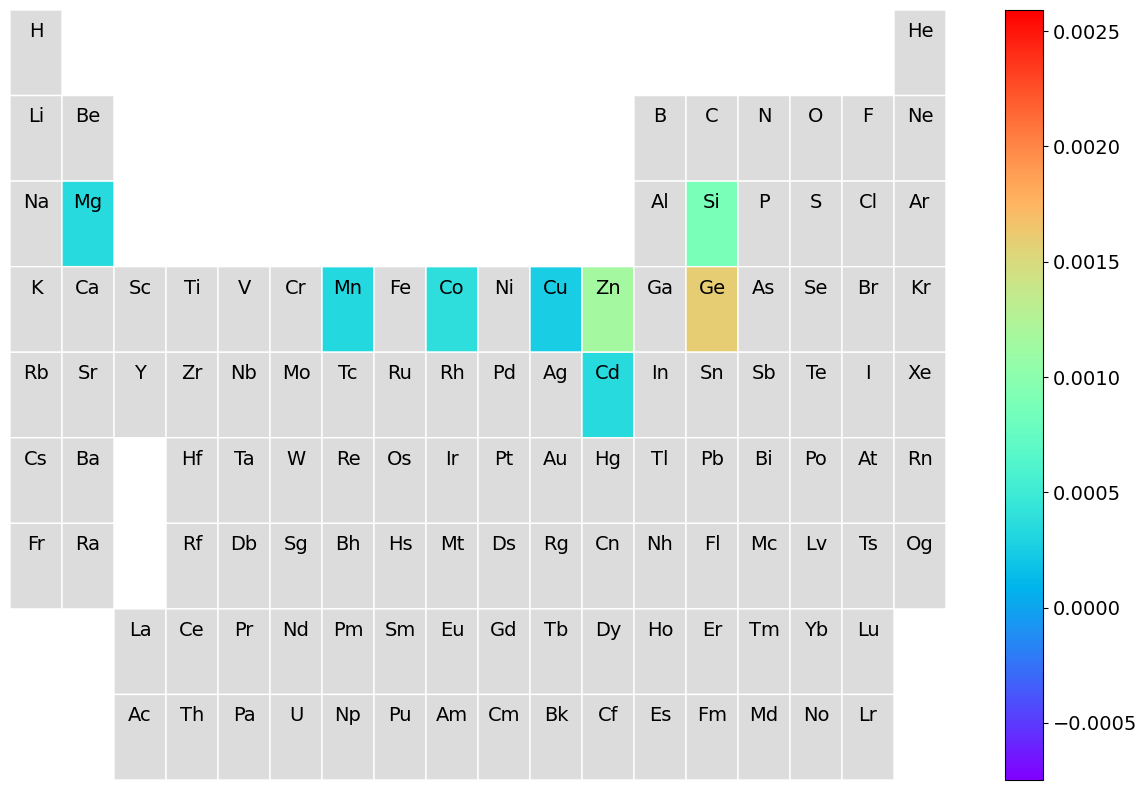

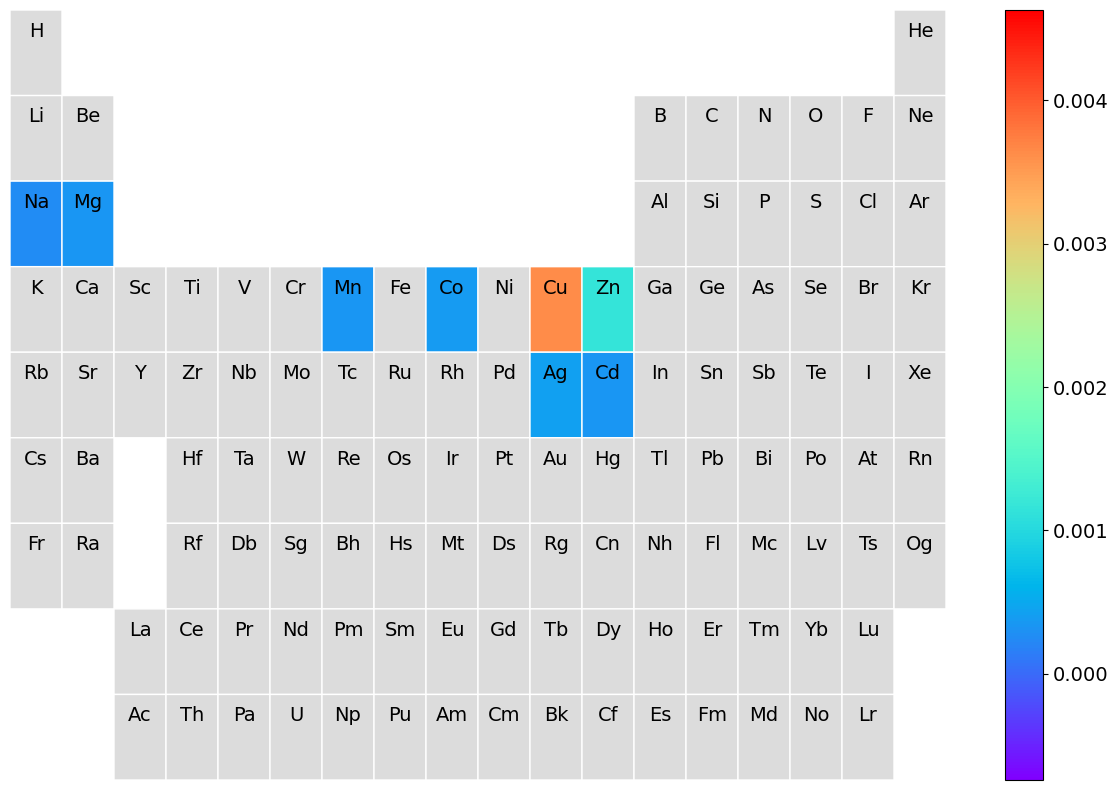

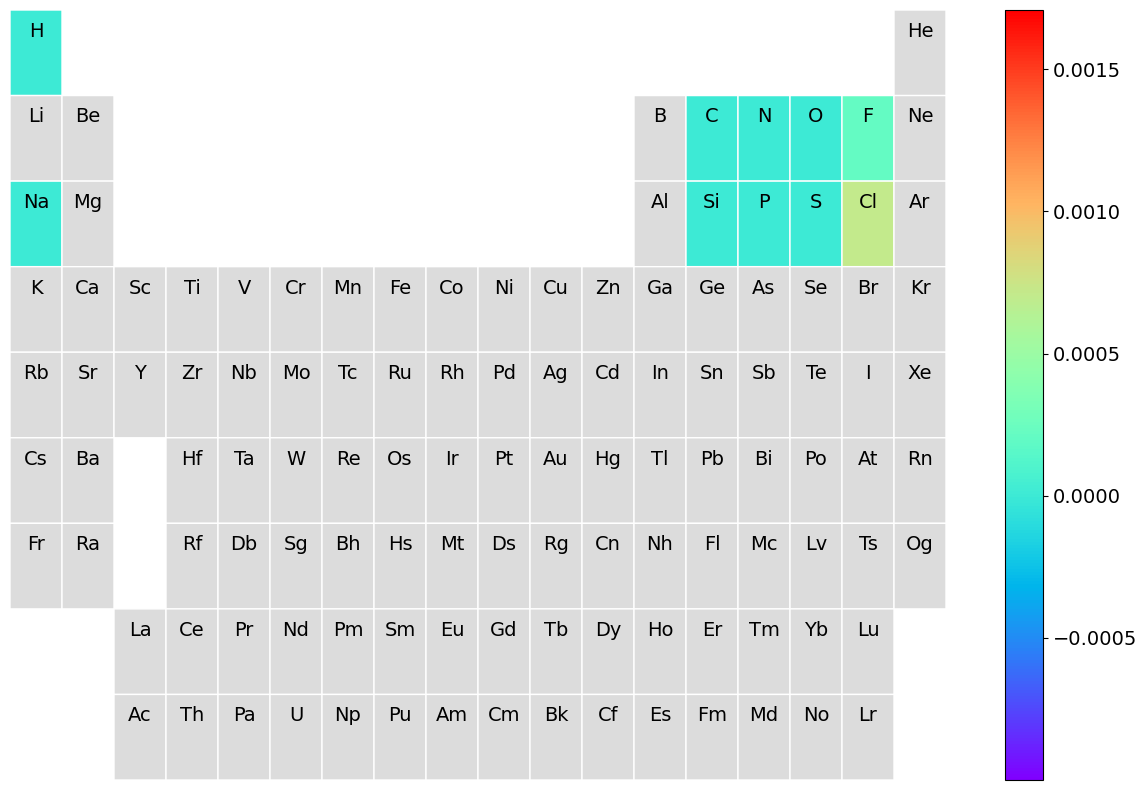

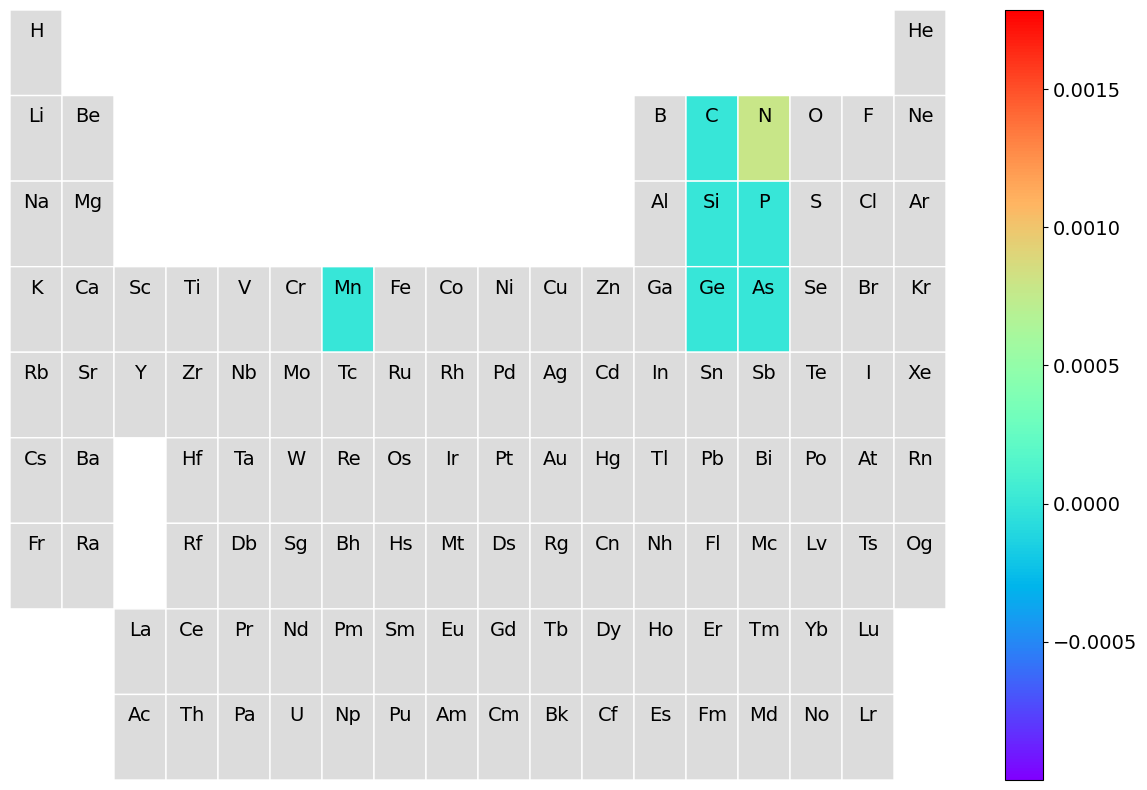

In [7]:
quaternary.get_dopants(num_dopants=10, plot_heatmap=True)